In [28]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [29]:
# Load dataset (Wholesale Customers)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data = pd.read_csv(url)

print("Dataset shape:", data.shape)
print(data.head())

Dataset shape: (440, 8)
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [30]:
# Select features (drop categorical if any)
X = data.drop(columns=["Channel", "Region"])  # Keep only spending categories
X.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


🔹 Standardise the data centered on mean = 0

In [31]:
# 4️⃣ Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]  # Display first 5 rows of scaled data

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       [ 0.10011141, -0.62401993, -0.3929769 ,  0.6871443 , -0.49858822,
         0.09341105],
       [ 0.84023948, -0.05239645, -0.07935618,  0.17385884, -0.23191782,
         1.29934689]])

🔹 KMEANS CLUSTERING

K-mean cluster k value can be calculated using Elbow method and Silhouette Score.

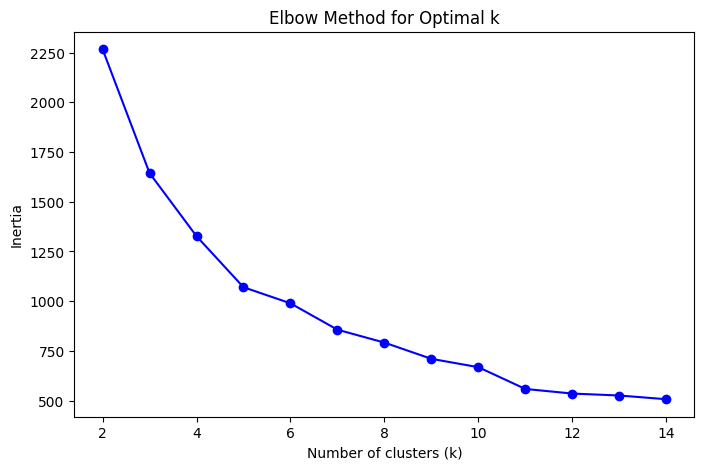

In [32]:
# Find optimal number of clusters (Elbow method)
inertia = []
K = range(2, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, "bo-")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [46]:
# Fit KMeans (choose k=3 based on hit and trial from Shilhouette score and Elbow method)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)
data["KMeans_Cluster"] = clusters_kmeans

print("Silhouette Score (KMeans):", silhouette_score(X_scaled, clusters_kmeans))

Silhouette Score (KMeans): 0.4582633767207058


🔹 DBSCAN CLUSTERING

Clustering method which uses eps to determine the max distance to group together points and min_sample to define the minimum number of points required to become a cluster. The points satisfying these 2 requirements become the core points, the points which are not core point but lie in the region of core points are called bounadry points and the points which are neither core nor boundary are noise points. The clustering of points below gives only 2 clusters.

In [55]:
# Fit DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)   # tweak eps, min_samples
clusters_dbscan = dbscan.fit_predict(X_scaled)
data["DBSCAN_Cluster"] = clusters_dbscan

print("DBSCAN unique clusters:", set(clusters_dbscan))

DBSCAN unique clusters: {np.int64(0), np.int64(-1)}


🔹 PCA for Visualization

Principle Component Analysis is a dimensionality reduction method used to reduce higher diemension data to lower dimension(usually 2 or 3 dimensions) so that the data can be visualized easily. The following example the data is reduced to 2 dimension for easier visualization (PCA1 and PCA2).

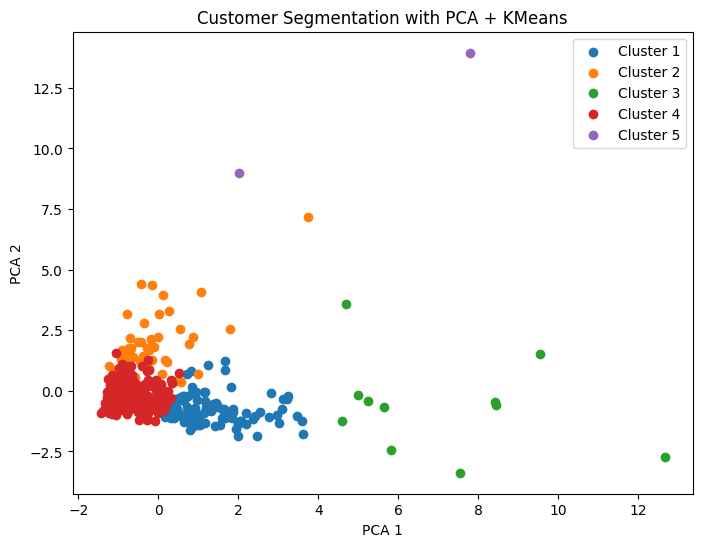

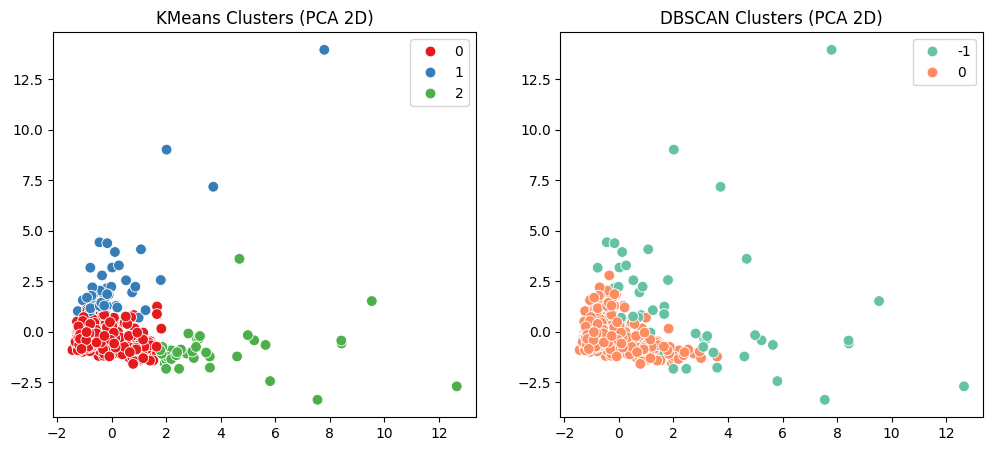

In [56]:
#  Reduce dimensions with PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
for cluster in range(5):
    plt.scatter(X_pca[clusters==cluster, 0], X_pca[clusters==cluster, 1], label=f"Cluster {cluster+1}")

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Customer Segmentation with PCA + KMeans")
plt.legend()
plt.show()

# Reduce to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize KMeans clusters
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters_kmeans, palette="Set1", s=60)
plt.title("KMeans Clusters (PCA 2D)")

# Visualize DBSCAN clusters
plt.subplot(1,2,2)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters_dbscan, palette="Set2", s=60)
plt.title("DBSCAN Clusters (PCA 2D)")

plt.show()